# Introduction
This notebook introduces pandas, dataframes, data manipulation and plotting in python. It is not anb extensive guide and if you never worked in python before we recommend finding a more extensive tutorial

In [1]:
# Some tools
import supp

# Pandas ( dataframe support )
import pandas as pd

# Import numpy ( some math functions )
import numpy as np

C:\Users\fredr\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


Supp lib imported


### Import data
The helper module supp.py includes helper functions that will help you load the provided data in to a dataframe. (If you need more information regarding pandas as dataframes there are a lot of goods tutorials out there)

The snippet below retrieves the adjusted close prices of the data set:

In [2]:
# Import data from pickle
data = supp.load_data("ADJUSTED_CLOSE_PRICES")
data = data.ffill()
data.head(1)

C:\Users\fredr\ap1-case\supp.py:29: RuntimeWarning: invalid value encountered in log
  lgrt=np.log(prices / prices.shift(1))


EUR/USD  GBP/USD   JPY/USD   SEK/USD  FTSE (GBP)  DAX (EUR)  \
Date                                                                       
2004-01-06 -0.002668 -0.00762 -0.000094 -0.000182   -0.001796  -0.000114   

            SPX (USD)  Nikkei (JPY)  OMX (SEK)  
Date                                            
2004-01-06   0.001291     -0.001033        NaN

### Select SPX Data

Pandas lets you select data using the names of the columns. The snippet below selects only the SPX data:

Syntax is: dataframe.loc[*from_row*:* to_row* , *from_column*:*to_column*] 

In [3]:
# Selkect SPX data
spx=data.loc[:,["SPX (USD)"]]

# Check out the data
spx.head()

SPX (USD)
Date                 
2004-01-06   0.001291
2004-01-07   0.002364
2004-01-08   0.004951
2004-01-09  -0.008927
2004-01-12   0.004775

### Converting data from log returns to returns (and vice versa)
The data is quoted as log returns but we can convert it to index values:

In [4]:
# Convert to price index:
spx_index=spx.to_index()

# Check out the data
spx_index.head()

SPX (USD)
Date                  
2004-01-06  100.129208
2004-01-07  100.366238
2004-01-08  100.864358
2004-01-09   99.967921
2004-01-12  100.446437

We can also convert it back to log returns

In [5]:
# Convert back to log returns (will lose out on the first observation):
spx_index.to_log_returns().head()

SPX (USD)
Date                 
2004-01-07   0.002364
2004-01-08   0.004951
2004-01-09  -0.008927
2004-01-12   0.004775
2004-01-13  -0.005346

### Plotting
Matplotlib is a great library for plotting data

In [6]:
# Import plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

We can plot directly from the dataframe object:

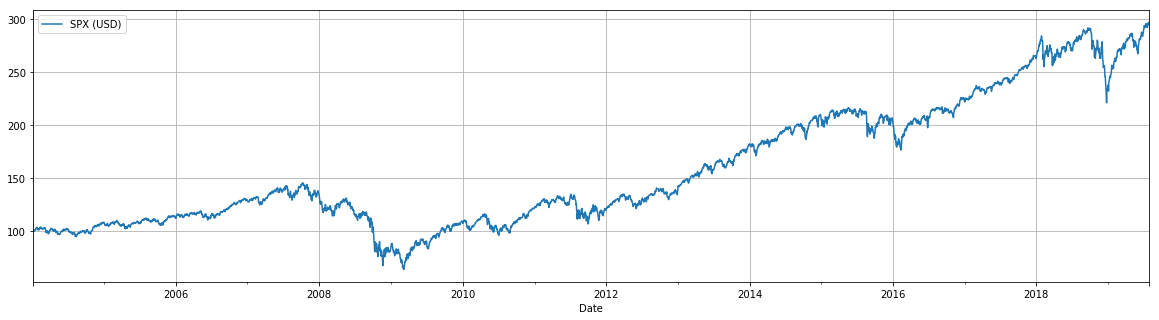

In [7]:
# Plot directly from dataframe object
spx_index.plot(figsize=(20, 5), grid=True)

... Or by selecting the time series:

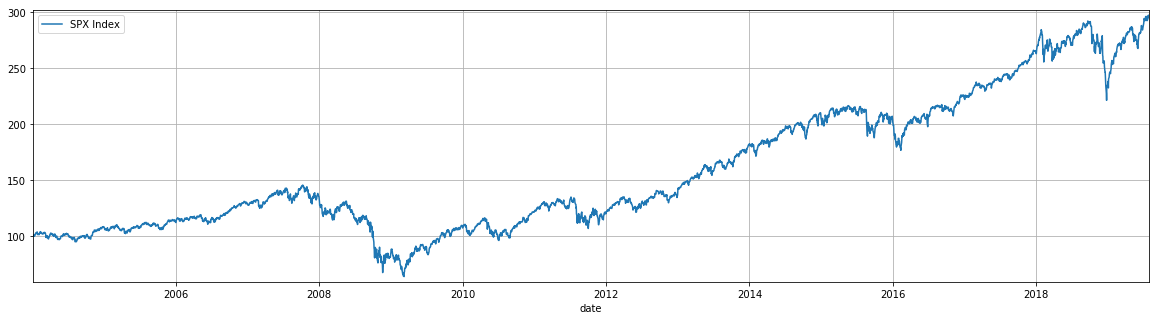

In [8]:
# Plot via plt
plt.figure(figsize=(20, 5))
plt.plot(spx_index)
# Above is enough for a quick plot, below some options to make it look better
plt.grid(True)
plt.legend(['SPX Index'])
plt.xlabel('date')
plt.margins(0, 0.02) 

### Rolling and resample
We can also use the built in panadas functions to resample the data.

The snippet below converts the daily timeseries to monthly

In [9]:
# Use resample to change frequency of observations:
spx_index_monthly =  spx_index.resample('M').last()
spx_index_monthly.head()

SPX (USD)
Date                  
2004-01-31  101.486667
2004-02-29  102.163993
2004-03-31  100.492699
2004-04-30   98.700520
2004-05-31   99.839709

The rolling() functions will apply a function over a rolling time window. The example below will calculate a 252 days rolling average

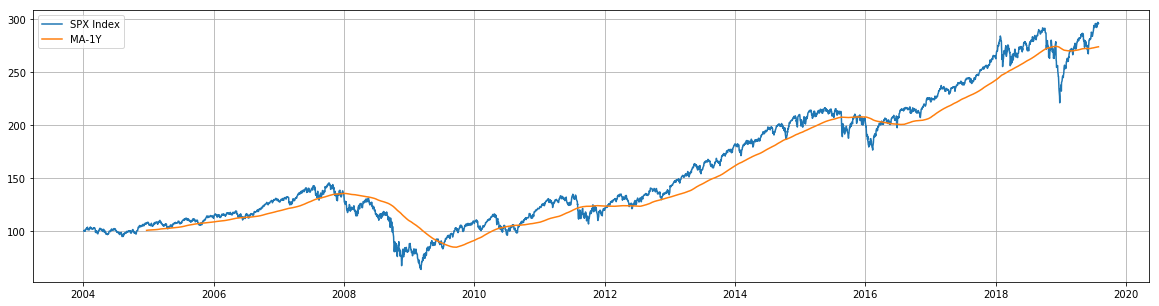

In [10]:
# Use rolling to apply calculations over a rolling window:
# We use 252 as this is approximately how many trading days there are per market
spx_index_rolling_mean_1Y =  spx_index.rolling(252).mean() 
spx_index_rolling_mean_1Y.columns=['SPX Index 1Y MA']
# Plot
plt.figure(figsize=(20, 5))
plt.plot(spx_index)
plt.plot(spx_index_rolling_mean_1Y)
plt.legend(['SPX Index', 'MA-1Y'])
plt.grid(True)

We can also use rolling to calculate rolling standard devation:

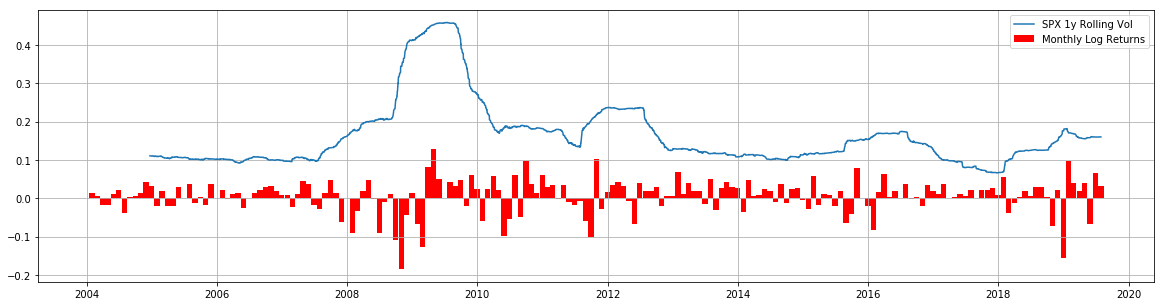

In [11]:
# Calculate rolling 1Y standard deviation (vol)
# Multiply by square root of 252 to scale to yearly volatility
spx_std=(spx.rolling(252).std())*np.sqrt(252)
spx_std.columns=['SPX Std']
spx_monthly_returns=spx.resample('M').sum()
# Visualizing
plt.figure(figsize=(20, 5))
plt.plot(spx_std)
plt.bar(spx_monthly_returns.index, spx_monthly_returns.values.squeeze(),alpha=1, color="red", width=30)
plt.legend(['SPX 1y Rolling Vol', 'Monthly Log Returns'])
plt.grid(True)